In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from natsort import natsorted

In [2]:
import sys
import os

# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(r'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

In [3]:
tidy3dAPI = os.environ["API_TIDY3D_KEY"]

In [4]:
a = 5/3

In [5]:
import xarray as xr
import imageio

def create_movie(field_time_out, monitor_lambdas,name='',type='t',log=False,path="",frames_per_second=1,rem_frames=False, normalize=True, a=5/3):
    frames = []

    max_values = field_time_out.max(axis=(0,1,2)) if normalize else 1

    field_time_out = field_time_out/max_values
    field_time_out['x'] = field_time_out['x']/a
    field_time_out['y'] = field_time_out['y']/a
    field_time_out['z'] = field_time_out['z']/a


    if log:
        field_log = np.log10((field_time_out))
        folder_pics = "logPics"
        
    else:
        field_log = ((field_time_out))
        folder_pics = "linPics"

    if not os.path.exists(f'{path}/{folder_pics}'):
            os.makedirs(f'{path}/{folder_pics}')
            print(f"Folder {path}/{folder_pics} created successfully.")

    for i, time in enumerate(field_time_out.t):
        if os.path.isfile(f'{path}/{folder_pics}/frame_{i}.png'):
            frames.append(f'{path}/{folder_pics}/frame_{i}.png')
            continue
        try:
            fig, ax = plt.subplots(figsize=(14/2, 18/2))
            #fig, ax = plt.subplots(figsize=(12, 6))
            if type=="t":
                pcolormesh = (field_log).isel(t=i).squeeze().plot.pcolormesh(ax=ax,cmap="jet")
            else:
                pcolormesh = (field_log).isel(f=i).squeeze().plot.pcolormesh(ax=ax,cmap="jet")

            ax.set_aspect('auto', adjustable='box')
            try:
                plt.title(f'Time: {str(np.array(field_time_out['t'][()][i])*1e12)} ps')
            except:
                plt.title(f'$\\nu$: {(1/np.array(td.C_0/field_time_out['f'][()][i])):.4g}')


            # Save the frame
            plt.savefig(f'{path}/{folder_pics}/frame_{i}.png')
            plt.close(fig)
            frames.append(f'{path}/{folder_pics}/frame_{i}.png')
        except:
            break
        

    name_movie = f'{path}/{name}.mp4' if name else f'output/anderson/d(t) analysis/Diameter d(t) at output of the structure Range - {monitor_lambdas[0]:.3g} - {monitor_lambdas[-1]:.3g}.mp4'
    with imageio.get_writer(name_movie, fps=frames_per_second) as writer:
        for frame in frames:
            image = imageio.imread(frame)
            writer.append_data(image)

    # Optionally, remove the individual frames if no longer needed
    if rem_frames:
        for frame in frames:
            os.remove(frame)
    
    return False

RCP  0.08 - 0.09999999999999999.txt
RCP  0.17000000000000004 - 0.19.txt
Configured successfully.


21:33:01 W. Europe Daylight Time ERROR: Expected field 'task_id' is unset.      

No Reference Simulation was found for this case


Output()

21:39:35 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\08_16_2024 STL RCP    
                                 Sample Test Beam Spreading\z_incidence\RCP     
                                 0.17000000000000004 - 0.19.txt/Data.hdf5

21:43:38 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 0.0107 is greater than the simulation shutoff  
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

21:43:39 W. Europe Daylight Time Billed flex credit cost: 45.702.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

Simulation Parameters (wavelengths are expressed in um):
lambda_range: 8.87 - 9.69 um 
lambdaw (pulse) 416.66666666666754 
lambda0 9.25925925925926 
Runtime = 40.0 
resolution = 15.0 
time_per_fwidth = 28.780075967999938 
final decay value = 0.0107 



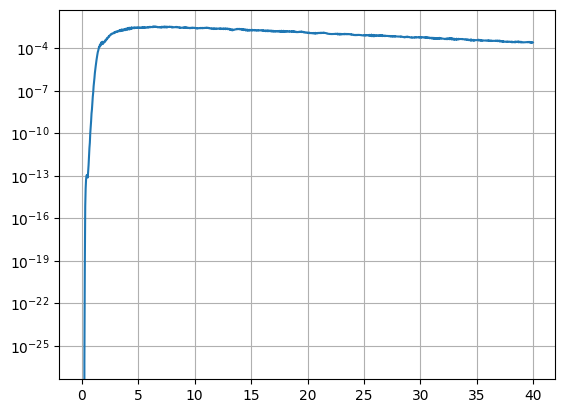

(1, 1253, 371, 1077)
Folder H:\phd stuff\tidy3d\output/3D SHU/Beam Spreading/linPics created successfully.


C:\Users\HernandF\AppData\Local\Temp\ipykernel_19624\2204351561.py:57: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (700, 900) to (704, 912) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [6]:
folder_path = r"H:\phd stuff\tidy3d\data\08_16_2024 STL RCP Sample Test Beam Spreading\z_incidence"
      

for i,filename in enumerate(natsorted(os.listdir(folder_path))):
    print(filename)
    if filename  != "RCP  0.17000000000000004 - 0.19.txt":
        continue
    file=os.path.join(folder_path, filename)
    sim_object_result = AM.loadFromFile(key = tidy3dAPI, file_path=file)
    monitor_lambdas = a/sim_object_result.monitor_lambdas
    print(sim_object_result.__str__())
    sim_data = sim_object_result.sim_data

    #Plot T(t)
    flux_t = sim_data["time_monitorT"].flux
    times = flux_t['t']*1e12
    plt.plot(times,flux_t)
    plt.yscale("log")
    plt.grid()
    plt.show()

    field_time_out = sim_data.get_intensity("time_monitorFieldLateral")
    print(np.shape(field_time_out))
   
    create_movie(field_time_out,monitor_lambdas,name=f"timemonitor {monitor_lambdas[0]:.3g} - {monitor_lambdas[-1]:.3g}",type="t",log=False,path=r"H:\phd stuff\tidy3d\output/3D SHU/Beam Spreading",frames_per_second=10,normalize=True,a=a)


